In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
data = pd.read_csv(r'C:\Users\mk744\OneDrive - Poornima University\Desktop\Feature Scaling\Basic_statistics\Wine-quality-challenge.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Find Correlations

In [67]:
# Correlation between fixed acidity and residual sugar

def Correlations(data:pd.DataFrame)->pd.DataFrame:
     
     try:
          
          correlation_matrix = data[['fixed acidity', 'residual sugar']].corr()
          return correlation_matrix
     
     except AttributeError:
          raise AttributeError("Attribute Errors:")
     
     except Exception as e:
          print(f"Error: {e}")
          
          return None
     
Correlations(data)


,fixed acidity,residual sugar
fixed acidity,1.000000,0.114777
residual sugar,0.114777,1.000000


In [68]:
def Correlation(data:pd.DataFrame)->pd.DataFrame:
     
     """
     Calculate Correlation between 'volatile acidity' and 'citric acid' in the input DataFrame.
     
     Args:
        data(pd.DataFrame): Input DataFrame containing 'volatile acidity' and 'citric acid'
        
     Returns:
         pd.DataFrame returns correlation of two columns 'volatile acidity' and 'citric acid'
         
     Raises:
        KeyError: if required columns are missing.
        TypeError: if input is not a pandas DataFrame.
        
     """
     
     try:
          
          # check input is a DataFrame
          if not isinstance(data, pd.DataFrame):
               raise TypeError("Input must be a pandas DataFrame")
          
          
          # check if required columns exist.
          req_cols = ['volatile acidity', 'citric acid'] 
          if not all(col in data.columns for col in req_cols):
               raise KeyError("DataFrame must contains 'volatile acidity' and 'citric acid' columns.")
          
          correlation_matrix = data[['volatile acidity','citric acid']].corr()
          return correlation_matrix
     
     except (TypeError, KeyError) as e:
          print(f"Error: {e}")
     
     except Exception as e:
          print(f"Unexpected error: {e}")
          return None
     
     
Correlation(data)

,volatile acidity,citric acid
volatile acidity,1.000000,-0.552496
citric acid,-0.552496,1.000000


# Task
- Find : mean, median, mode, Range, quantiles and Correlation.
- Visualize Correlation on graph.

In [69]:
def Descriptive_Stats(data:pd.DataFrame)->pd.DataFrame:
     
     """
      Calculate mean, median, mode, Range, quantiles of 'fixed acidity' columns
      and Correlation between 'citric acid' and 'chlorides'.
      
      Args:
         data(pd.DataFrame): Input DataFrame containing these columns 'fixed acidity', 'citric acid' and 'chlorieds'.
         
     Return:
        pd.DataFrame returns mean, median, mode, IQR, Std, Range, Quantiles of 'fixed acidity' column
        and Correlation between 'citric acid' and 'chlorides'.
        
     Raises:
        KeyError: If required columns are missing.
        TypeError: If input is not pandas DataFrame.
        
     """
     try:
        
         
            # check input is a DataFrame
            
            if not isinstance(data, pd.DataFrame):
               raise TypeError("Input must be pandas DataFrame")
            
            # check columns must be in DataFrame
            req_cols = ['fixed acidity']
            if not all(col in data.columns for col in req_cols):
               raise KeyError("Data Frame must contains 'fixed aicidity columns'")
            
        
            describe = data.groupby('fixed acidity').agg(
                                 Average_acidity = ("fixed acidity", lambda a: int(np.ceil(a.mean()))),
                                 Median_acidity = ("fixed acidity", lambda b: int(np.ceil(b.median()))),
                                 Most_frequent_acidity = ("fixed acidity", lambda c: int(np.ceil(c.mode()[0]))),
                                 Q1_acidity = ("fixed acidity", lambda d: int(np.ceil(d.quantile(0.25)))),
                                 Q2_acidity = ("fixed acidity", lambda e: int(np.ceil(e.quantile(0.50)))),
                                 Q3_acidity = ("fixed acidity", lambda f: int(np.ceil(f.quantile(0.75)))),
                                 Range_acidity = ("fixed acidity", lambda h: int(np.ceil(h.max() - h.min())))
                                 
                                 ).reset_index().sort_values(by = 'Average_acidity', ascending = False)
            return describe
     except (TypeError, KeyError) as e:
         print(f"Error: {e}")
         
     except Exception as e:
         print(f"Unexpected Error: {e}")
         return None
      
      
def Corr(data:pd.DataFrame)->pd.DataFrame:
   
   try:
      
      # check input is a DataFrame
      if not isinstance(data, pd.DataFrame):
         raise TypeError("Input must be in pd.DataFrame")
      
      # check columns must be in DataFrame
      
      req_cols = ['citric acid','chlorides']
      if not all(col in data.columns for col in req_cols):
         raise KeyError("DataFrame must contains the columns")
      
      corr = data[['citric acid', 'chlorides']].corr()
      return corr
   
   except (TypeError,KeyError) as e:
      print(f"Error: {e}")
      
   except Exception as e:
      print(f"Unexpected: {e}")
      return None
   
def Visualizes(data:pd.DataFrame)->None:
   
   try:
      
      # check input in DataFrame
      if not isinstance(data, pd.DataFrame):
         raise TypeError("Input must be in DataFrame")
      
      # Check columns are in DataFrame or not
      req_cols = ['citric acid', 'chlorides']
      if not all(col in data.columns for  col in req_cols):
         raise KeyError("DataFrame must contains the columns")
      
      import seaborn as sns
      plt.figure(figsize=(5, 3))
      sns.set(font_scale=2)
      dataset = data[req_cols]
      sns.heatmap(
                  dataset.corr(),
                      annot = True,
                      fmt = '.2g',
                      center = 0,
                      cmap = 'coolwarm',
                      linewidths = 1,
                      linecolor = 'black'
                      )
      plt.show()
      
   except (TypeError, KeyError) as e:
      print(f"Error: {e}")
      
   except Exception as e:
      print(f"Unexpected Error: {e}")
      return None
   
Descriptive_Stats(data)

,fixed acidity,Average_acidity,Median_acidity,Most_frequent_acidity,Q1_acidity,Q2_acidity,Q3_acidity,Range_acidity
95,15.9,16,16,16,16,16,16,0
94,15.6,16,16,16,16,16,16,0
93,15.5,16,16,16,16,16,16,0
92,15.0,15,15,15,15,15,15,0
91,14.3,15,15,15,15,15,15,0
...,...,...,...,...,...,...,...,...
4,5.1,6,6,6,6,6,6,0
2,4.9,5,5,5,5,5,5,0
1,4.7,5,5,5,5,5,5,0
3,5.0,5,5,5,5,5,5,0


In [70]:
Corr(data)

,citric acid,chlorides
citric acid,1.000000,0.203823
chlorides,0.203823,1.000000


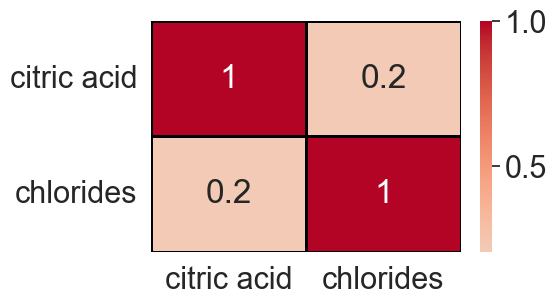

In [71]:
Visualizes(data)

In [72]:
# import Libraries
import pandas as pd
import math 
import scipy.stats as st
import statsmodels.stats.api as sm

# T-test between citric acid and chlorides

In [73]:
def T_Test(data: pd.DataFrame)->pd.DataFrame:
     
     """
        calculate t-test 
        between the columns
        of citric acid and chlorides.
        
        Args:
           (pd.DataFrame): input column must be present.
           
       Return:
           (pd.DataFrame): Return t-test between these columns
           citric acid and chlorides.
           
       TypeError: if Input is not in pd.DataFrame.
       KeyError: if required columns are missing.
          
     """
     
     try:
          # check input in DataFrame or not.
          if not isinstance(data, pd.DataFrame):
               raise TypeError("Input must be in DataFrame")
           
          # check columns are present or not.
          required_cols = ['citric acid','chlorides']
          if not all(cols in data.columns for cols in required_cols):
               raise KeyError("'citric acid' and 'chlorides' must be in pd.DataFrame.")
          
          
          alph = 0.05
          stat, p = st.ttest_ind(a = data['citric acid'], b = data['chlorides'])
          if p < alph:
               print("Reject the Null Hypothesis (H0) at alpha means are significant difference.")
               
          else:
               print("Fail to reject Null Hypothesis (H0) at alpha No significant difference.")
               
          return stat, p
     
     
     except (TypeError, KeyError) as e:
          print(f"Error: {e}")
          
          
     except Exception as e:
          print(f"Unexpected Error: {e}")
          return None
     
     

T_Test(data)
     

Reject the Null Hypothesis (H0) at alpha means are significant difference.


(36.61598423506605, 1.9968537145156356e-245)

In [74]:
from scipy.stats import ttest_rel
import pandas as pd
def Paired_Test(data: pd.DataFrame)->pd.DataFrame:
     
     try:
          
          if not isinstance(data, pd.DataFrame):
               raise TypeError("Input is not in DataFrame")
          
          rel_cols = ['citric acid', 'chlorides']
          if not all(cols in data.columns for cols in rel_cols):
               raise KeyError("Columns must be in DataFrame")
          befor = data['citric acid']
          after = data['chlorides']
          alpha = 0.05
          stat, p = st.ttest_rel(befor, after)
          
          if p < alpha:
               print("Reject the Null Hypothesis (H0) at alpha means are significant difference.")
               
          else:
               print("Fail to reject Null Hypothesis (H0) at alpha No significant difference.")
               
          return stat, p
     
     
     except (TypeError, KeyError) as e:
          print(f"Error: {e}")
          
     except Exception as e:
          print(f"Unexpected Error : {e}")
          return None
     
     
Paired_Test(data)
          

Reject the Null Hypothesis (H0) at alpha means are significant difference.


(38.448635430421696, 1.5209749323054588e-229)

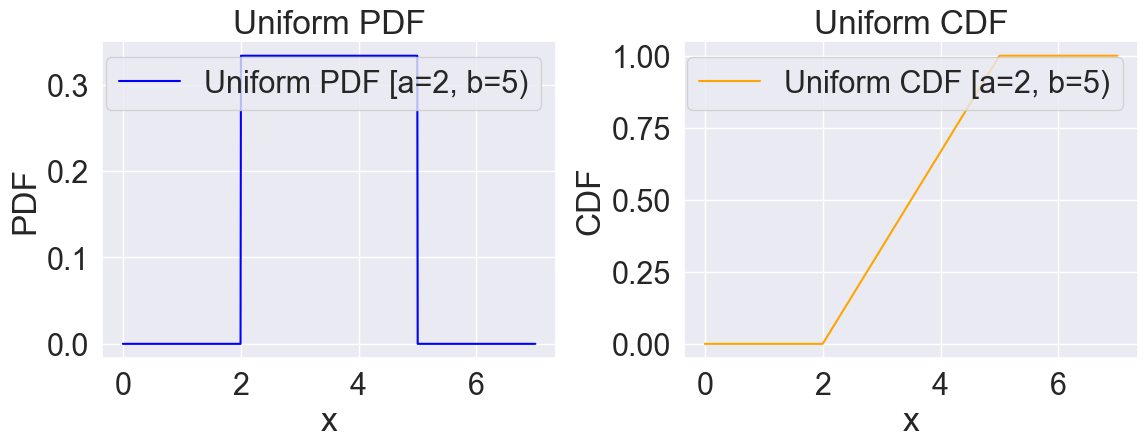

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Uniform PDF and CDF functions (from previous code)
def uniform_pdf(x: float, a: float = 0, b: float = 1) -> float:
    if a >= b:
        raise ValueError("Lower bound 'a' must be less than upper bound 'b'.")
    if a <= x < b:
        return 1 / (b - a)
    return 0

def uniform_cdf(x: float, a: float = 0, b: float = 1) -> float:
    if a >= b:
        raise ValueError("Lower bound 'a' must be less than upper bound 'b'.")
    if x < a:
        return 0
    elif a <= x < b:
        return (x - a) / (b - a)
    else:
        return 1

# Visualization function
def visualize_uniform_distribution(a: float = 2, b: float = 5):
    """
    Visualize the PDF and CDF of a Uniform Distribution over the range [a, b).

    Args:
        a (float): Lower bound of the uniform distribution.
        b (float): Upper bound of the uniform distribution.
    """
    # Generate x values for plotting
    x_values = np.linspace(a - 2, b + 2, 1000)  # Extra range for better visualization
    pdf_values = [uniform_pdf(x, a, b) for x in x_values]
    cdf_values = [uniform_cdf(x, a, b) for x in x_values]

    # Create the plots
    plt.figure(figsize=(12, 5))

    # Plot PDF
    plt.subplot(1, 2, 1)
    plt.plot(x_values, pdf_values, label=f"Uniform PDF [a={a}, b={b})", color='blue')
    plt.title("Uniform PDF")
    plt.xlabel("x")
    plt.ylabel("PDF")
    plt.grid(True)
    plt.legend()

    # Plot CDF
    plt.subplot(1, 2, 2)
    plt.plot(x_values, cdf_values, label=f"Uniform CDF [a={a}, b={b})", color='orange')
    plt.title("Uniform CDF")
    plt.xlabel("x")
    plt.ylabel("CDF")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Run the visualization
if __name__ == "__main__":
    visualize_uniform_distribution(a=2, b=5)

Testing Uniform Distribution with range [2, 5):

PDF Values:
PDF at x = -1: 0.0000
PDF at x = 2: 0.3333
PDF at x = 3: 0.3333
PDF at x = 4: 0.3333
PDF at x = 5: 0.0000
PDF at x = 6: 0.0000

CDF Values:
CDF at x = -1: 0.0000
CDF at x = 2: 0.0000
CDF at x = 3: 0.3333
CDF at x = 4: 0.6667
CDF at x = 5: 1.0000
CDF at x = 6: 1.0000


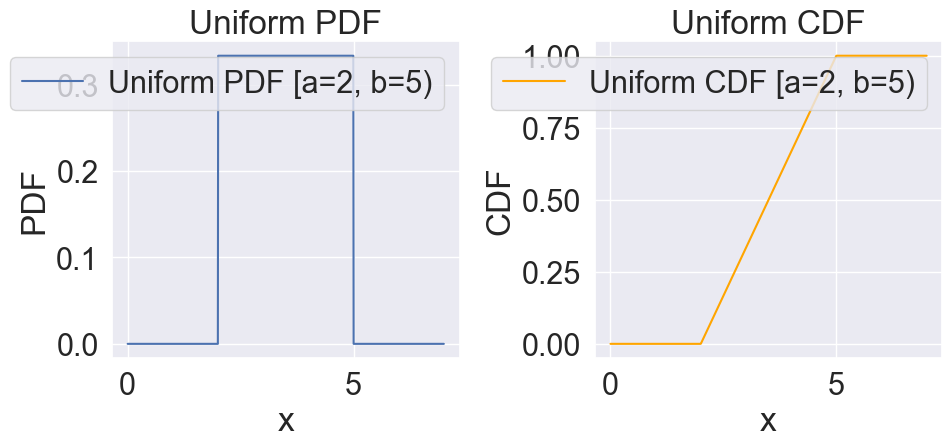

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def uniform_pdf(x: float, a: float = 0, b: float = 1) -> float:
    """
    Calculate the Probability Density Function (PDF) of a Uniform Distribution.

    Args:
        x (float): The value at which to evaluate the PDF.
        a (float): Lower bound of the uniform distribution (default: 0).
        b (float): Upper bound of the uniform distribution (default: 1).

    Returns:
        float: The PDF value at x. Returns 1/(b-a) if x is in [a, b), else 0.

    Raises:
        ValueError: If a >= b.
    """
    if a >= b:
        raise ValueError("Lower bound 'a' must be less than upper bound 'b'.")
    
    if a <= x < b:
        return 1 / (b - a)  # PDF is constant over [a, b)
    return 0

def uniform_cdf(x: float, a: float = 0, b: float = 1) -> float:
    """
    Calculate the Cumulative Distribution Function (CDF) of a Uniform Distribution.

    Args:
        x (float): The value at which to evaluate the CDF.
        a (float): Lower bound of the uniform distribution (default: 0).
        b (float): Upper bound of the uniform distribution (default: 1).

    Returns:
        float: The CDF value at x, i.e., P(X <= x).

    Raises:
        ValueError: If a >= b.
    """
    if a >= b:
        raise ValueError("Lower bound 'a' must be less than upper bound 'b'.")
    
    if x < a:
        return 0  # Before the range, probability is 0
    elif a <= x < b:
        return (x - a) / (b - a)  # Linear increase between a and b
    else:
        return 1  # After the range, probability is 1

# Testing and Visualization
def test_and_visualize():
    """
    Test the uniform PDF and CDF functions and visualize them.
    """
    # Test cases
    a, b = 2, 5  # Range [2, 5)
    test_values = [-1, 2, 3, 4, 5, 6]
    
    print("Testing Uniform Distribution with range [2, 5):")
    print("\nPDF Values:")
    for x in test_values:
        pdf_value = uniform_pdf(x, a, b)
        print(f"PDF at x = {x}: {pdf_value:.4f}")
    
    print("\nCDF Values:")
    for x in test_values:
        cdf_value = uniform_cdf(x, a, b)
        print(f"CDF at x = {x}: {cdf_value:.4f}")

    # Visualization
    x_values = np.linspace(0, 7, 1000)
    pdf_values = [uniform_pdf(x, a, b) for x in x_values]
    cdf_values = [uniform_cdf(x, a, b) for x in x_values]

    plt.figure(figsize=(10, 5))
    
    # Plot PDF
    plt.subplot(1, 2, 1)
    plt.plot(x_values, pdf_values, label=f"Uniform PDF [a={a}, b={b})")
    plt.title("Uniform PDF")
    plt.xlabel("x")
    plt.ylabel("PDF")
    plt.grid(True)
    plt.legend()

    # Plot CDF
    plt.subplot(1, 2, 2)
    plt.plot(x_values, cdf_values, label=f"Uniform CDF [a={a}, b={b})", color='orange')
    plt.title("Uniform CDF")
    plt.xlabel("x")
    plt.ylabel("CDF")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Run the test
if __name__ == "__main__":
    test_and_visualize()

In [79]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import statsmodels.api as sm
from scipy.stats import t

def slope_hypo_test(data: pd.DataFrame, x_col='citric acid', y_col='chlorides', alpha=0.05):
    """
    Performs a t-test for the slope of a regression line.
    
    Parameters:
    - data: pd.DataFrame containing the data
    - x_col: Name of the independent variable column (default: 'citric acid')
    - y_col: Name of the dependent variable column (default: 'chlorides')
    - alpha: Significance level (default: 0.05)
    
    Returns:
    - t_stat: T-statistic
    - p_value: P-value
    """
    try:
        # Check if input is a DataFrame
        if not isinstance(data, pd.DataFrame):
            raise TypeError("Input must be a pd.DataFrame")
        
        # Check if required columns exist
        req_cols = [x_col, y_col]
        if not all(col in data.columns for col in req_cols):
            raise KeyError(f"Columns {req_cols} must be in the DataFrame")
        
        # Add constant to independent variable (X)
        X = sm.add_constant(data[x_col])
        y = data[y_col]
        
        # Fit regression model
        model = sm.OLS(y, X).fit()
        
        # Extract slope, standard error, t-statistic, and p-value
        b1 = model.params[1]  # Slope (for x_col)
        se_b1 = model.bse[1]  # Standard error of slope
        t_stat = b1 / se_b1   # T-statistic
        p_value = model.pvalues[1]  # P-value for slope
        
        # Degrees of freedom
        df = len(data[x_col]) - 2
        
        # Critical t-value
        critical_t = t.ppf(1 - alpha/2, df)
        
        # Decision
        decision = "Reject H₀ (Slope is significant)" if abs(t_stat) > critical_t else "Fail to reject H₀ (Slope is not significant)"
        
        # Create a dictionary with results
        results = {
            "Parameter": ["Slope (b₁)", "Standard Error", "T-statistic", "P-value", "Critical t-value", "Decision"],
            "Value": [f"{b1:.4f}", f"{se_b1:.4f}", f"{t_stat:.4f}", f"{p_value:.4f}", f"±{critical_t:.4f}", decision]
        }
        
        # Convert to DataFrame
        results_df = pd.DataFrame(results)
        
        # Print the DataFrame
        print(f"T-test for Slope (Regression) between {x_col} and {y_col}:")
        print(results_df)
        
        return t_stat, p_value
    
    except (TypeError, KeyError) as e:
        print(f"Error: {e}")
    
    except Exception as e:
        print(f"Unexpected Error: {e}")

# Run the function
print("Running the test...")
slope_hypo_test(data)

Running the test...
T-test for Slope (Regression) between citric acid and chlorides:
          Parameter                             Value
0        Slope (b₁)                            0.0492
1    Standard Error                            0.0059
2       T-statistic                            8.3199
3           P-value                            0.0000
4  Critical t-value                           ±1.9615
5          Decision  Reject H₀ (Slope is significant)


(8.319923325919845, 1.863705033133956e-16)

In [80]:
5624/1127

4.990239574090506